In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

RAW MEASURES

In [6]:
dataset = pd.read_csv("CO22339_network_data.csv")
dataset.head()

,Header_Length,Protocol Type,fin_flag_number,syn_flag_number,psh_flag_number,ICMP,Tot sum,Min,IAT,label
0,54.00,6.00,1,0,0,0,567.00,54.00,83343831.92,DDoS-RSTFINFlood
1,57.04,6.33,0,0,0,0,581.33,54.00,82926067.47,DoS-TCP_Flood
2,0.00,1.00,0,0,0,1,441.00,42.00,83127993.93,DDoS-ICMP_Flood
3,76175.00,17.00,0,0,0,0,525.00,50.00,83015696.38,DoS-UDP_Flood
4,101.73,6.11,0,1,0,0,644.60,57.88,82972999.18,DoS-SYN_Flood


In [8]:
dataset[['Header_Length', 'Protocol Type', 'ICMP']].head()

,Header_Length,Protocol Type,ICMP
0,54.00,6.00,0
1,57.04,6.33,0
2,0.00,1.00,1
3,76175.00,17.00,0
4,101.73,6.11,0


In [10]:
dataset[['Header_Length', 'Protocol Type', 'ICMP']].describe()

,Header_Length,Protocol Type,ICMP
count,2.386870e+05,238687.000000,238687.000000
mean,7.700997e+04,9.052570,0.162971
std,4.596463e+05,8.902223,0.369340
min,0.000000e+00,0.000000,0.000000
25%,5.400000e+01,6.000000,0.000000
50%,5.400000e+01,6.000000,0.000000
75%,3.368950e+02,14.120000,0.000000
max,9.809700e+06,47.000000,1.000000


Counts

In [12]:
popsong_df = pd.read_csv('CO22339_SpotifyCovers2024.csv', encoding='utf-8')
popsong_df.head(10)

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,image_url
0,MILLION DOLLAR BABY,Tommy Richman,3,2024,4,26,"30,716",92.0,"390,470,936",210.0,...,1,0,60,47,49,79,37,14,76,https://i.scdn.co/image/ab67616d0000b27301c0cd...
1,Not Like Us,Kendrick Lamar,4,2024,5,4,"28,113",92.0,"323,703,884",188.0,...,6,1,86,63,38,25,3,89,48,https://i.scdn.co/image/ab67616d0000b2731ea0c6...
2,i like the way you kiss me,Artemas,1,2024,3,19,"54,331",92.0,"601,309,283",190.0,...,8,0,52,49,36,37,78,87,41,https://i.scdn.co/image/ab67616d0000b273e67611...
3,Flowers,Miley Cyrus,3,2023,1,12,"269,802",85.0,"2,031,280,633",394.0,...,10,0,24,84,62,39,16,82,43,https://i.scdn.co/image/ab67616d0000b273cd2220...
4,Houdini,Eminem,3,2024,5,31,"7,223",88.0,"107,034,922",182.0,...,1,1,61,40,60,24,36,19,0,https://i.scdn.co/image/ab67616d0000b273810603...
5,Lovin On Me,Jack Harlow,4,2023,11,10,"105,892",83.0,"670,665,438",138.0,...,6,0,3,71,84,98,87,72,6,https://i.scdn.co/image/ab67616d0000b273fcf4ad...
6,Beautiful Things,Benson Boone,1,2024,1,18,"73,118",86.0,"900,158,751",280.0,...,3,0,93,21,91,68,35,91,47,https://i.scdn.co/image/ab67616d0000b273cc04ff...
7,Gata Only,FloyyMenor,1,2024,2,2,"40,094",92.0,"675,079,153",160.0,...,10,0,93,53,37,70,57,15,84,https://i.scdn.co/image/ab67616d0000b273c4583f...
8,Danza Kuduro - Cover,MUSIC LAB JPN,3,2024,6,9,1,NaN,"1,653,018,119",NaN,...,1,0,12,4,32,22,40,74,15,https://i.scdn.co/image/ab67616d0000b27394bee5...
9,BAND4BAND (feat. Lil Baby),Central Cee,2,2024,5,23,"10,400",86.0,"90,676,573",191.0,...,6,1,41,16,74,88,7,97,47,https://i.scdn.co/image/ab67616d0000b2737b588b...


Binarization

In [15]:
watched = np.array(popsong_df['streams'].str.replace(',', '').astype(float))
watched = np.nan_to_num(watched, np.nan).astype(int)
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(10)

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,image_url,watched
0,MILLION DOLLAR BABY,Tommy Richman,3,2024,4,26,"30,716",92.0,"390,470,936",210.0,...,0,60,47,49,79,37,14,76,https://i.scdn.co/image/ab67616d0000b27301c0cd...,1
1,Not Like Us,Kendrick Lamar,4,2024,5,4,"28,113",92.0,"323,703,884",188.0,...,1,86,63,38,25,3,89,48,https://i.scdn.co/image/ab67616d0000b2731ea0c6...,1
2,i like the way you kiss me,Artemas,1,2024,3,19,"54,331",92.0,"601,309,283",190.0,...,0,52,49,36,37,78,87,41,https://i.scdn.co/image/ab67616d0000b273e67611...,1
3,Flowers,Miley Cyrus,3,2023,1,12,"269,802",85.0,"2,031,280,633",394.0,...,0,24,84,62,39,16,82,43,https://i.scdn.co/image/ab67616d0000b273cd2220...,1
4,Houdini,Eminem,3,2024,5,31,"7,223",88.0,"107,034,922",182.0,...,1,61,40,60,24,36,19,0,https://i.scdn.co/image/ab67616d0000b273810603...,1
5,Lovin On Me,Jack Harlow,4,2023,11,10,"105,892",83.0,"670,665,438",138.0,...,0,3,71,84,98,87,72,6,https://i.scdn.co/image/ab67616d0000b273fcf4ad...,1
6,Beautiful Things,Benson Boone,1,2024,1,18,"73,118",86.0,"900,158,751",280.0,...,0,93,21,91,68,35,91,47,https://i.scdn.co/image/ab67616d0000b273cc04ff...,1
7,Gata Only,FloyyMenor,1,2024,2,2,"40,094",92.0,"675,079,153",160.0,...,0,93,53,37,70,57,15,84,https://i.scdn.co/image/ab67616d0000b273c4583f...,1
8,Danza Kuduro - Cover,MUSIC LAB JPN,3,2024,6,9,1,NaN,"1,653,018,119",NaN,...,0,12,4,32,22,40,74,15,https://i.scdn.co/image/ab67616d0000b27394bee5...,1
9,BAND4BAND (feat. Lil Baby),Central Cee,2,2024,5,23,"10,400",86.0,"90,676,573",191.0,...,1,41,16,74,88,7,97,47,https://i.scdn.co/image/ab67616d0000b2737b588b...,1


In [20]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([watched])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,image_url,watched,pd_watched
0,MILLION DOLLAR BABY,Tommy Richman,3,2024,4,26,"30,716",92.0,"390,470,936",210.0,...,60,47,49,79,37,14,76,https://i.scdn.co/image/ab67616d0000b27301c0cd...,1,1
1,Not Like Us,Kendrick Lamar,4,2024,5,4,"28,113",92.0,"323,703,884",188.0,...,86,63,38,25,3,89,48,https://i.scdn.co/image/ab67616d0000b2731ea0c6...,1,1
2,i like the way you kiss me,Artemas,1,2024,3,19,"54,331",92.0,"601,309,283",190.0,...,52,49,36,37,78,87,41,https://i.scdn.co/image/ab67616d0000b273e67611...,1,1
3,Flowers,Miley Cyrus,3,2023,1,12,"269,802",85.0,"2,031,280,633",394.0,...,24,84,62,39,16,82,43,https://i.scdn.co/image/ab67616d0000b273cd2220...,1,1
4,Houdini,Eminem,3,2024,5,31,"7,223",88.0,"107,034,922",182.0,...,61,40,60,24,36,19,0,https://i.scdn.co/image/ab67616d0000b273810603...,1,1
5,Lovin On Me,Jack Harlow,4,2023,11,10,"105,892",83.0,"670,665,438",138.0,...,3,71,84,98,87,72,6,https://i.scdn.co/image/ab67616d0000b273fcf4ad...,1,1
6,Beautiful Things,Benson Boone,1,2024,1,18,"73,118",86.0,"900,158,751",280.0,...,93,21,91,68,35,91,47,https://i.scdn.co/image/ab67616d0000b273cc04ff...,1,1
7,Gata Only,FloyyMenor,1,2024,2,2,"40,094",92.0,"675,079,153",160.0,...,93,53,37,70,57,15,84,https://i.scdn.co/image/ab67616d0000b273c4583f...,1,1
8,Danza Kuduro - Cover,MUSIC LAB JPN,3,2024,6,9,1,NaN,"1,653,018,119",NaN,...,12,4,32,22,40,74,15,https://i.scdn.co/image/ab67616d0000b27394bee5...,1,1
9,BAND4BAND (feat. Lil Baby),Central Cee,2,2024,5,23,"10,400",86.0,"90,676,573",191.0,...,41,16,74,88,7,97,47,https://i.scdn.co/image/ab67616d0000b2737b588b...,1,1


Rounding

In [26]:
popsong_df['energy_10'] = np.array(np.round((popsong_df['energy_%'] * 10)), dtype='int')
popsong_df['energy_100'] = np.array(np.round((popsong_df['energy_%'] * 100)), dtype='int')
popsong_df[['track_name', 'energy_10', 'energy_100']].iloc[1:9]

,track_name,energy_10,energy_100
1,Not Like Us,380,3800
2,i like the way you kiss me,360,3600
3,Flowers,620,6200
4,Houdini,600,6000
5,Lovin On Me,840,8400
6,Beautiful Things,910,9100
7,Gata Only,370,3700
8,Danza Kuduro - Cover,320,3200


Interactions

In [27]:
atk_def = dataset[['Protocol Type', 'ICMP']]
atk_def.head()

,Protocol Type,ICMP
0,6.00,0
1,6.33,0
2,1.00,1
3,17.00,0
4,6.11,0


In [28]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[ 6.    ,  0.    , 36.    ,  0.    ,  0.    ],
       [ 6.33  ,  0.    , 40.0689,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ],
       ...,
       [ 6.11  ,  0.    , 37.3321,  0.    ,  0.    ],
       [ 6.11  ,  0.    , 37.3321,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ]])

In [29]:
pd.DataFrame(pf.powers_, columns=['Protocol_degree', 'ICMP_degree'])

,Protocol_degree,ICMP_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [30]:
intr_features = pd.DataFrame(res, columns=['Protocol Type', 'ICMP', 'Protocol Type^2', 'Protocol Type x ICMP', 'ICMP^2'])
intr_features.head(5)

,Protocol Type,ICMP,Protocol Type^2,Protocol Type x ICMP,ICMP^2
0,6.00,0.0,36.0000,0.0,0.0
1,6.33,0.0,40.0689,0.0,0.0
2,1.00,1.0,1.0000,1.0,1.0
3,17.00,0.0,289.0000,0.0,0.0
4,6.11,0.0,37.3321,0.0,0.0


Transforming new data in the futture

In [31]:
new_df = pd.DataFrame([[95, 75],[121, 120], [77, 60]],
                      columns=['Protocol Type', 'ICMP'])
new_df

,Protocol Type,ICMP
0,95,75
1,121,120
2,77,60


In [32]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res,
                                 columns=['Protocol Type', 'ICMP',
                                          'Protocol Type^2', 'Protocol Type x ICMP', 'ICMP^2'])
new_intr_features

,Protocol Type,ICMP,Protocol Type^2,Protocol Type x ICMP,ICMP^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


Binning

Text(0, 0.5, 'Level')

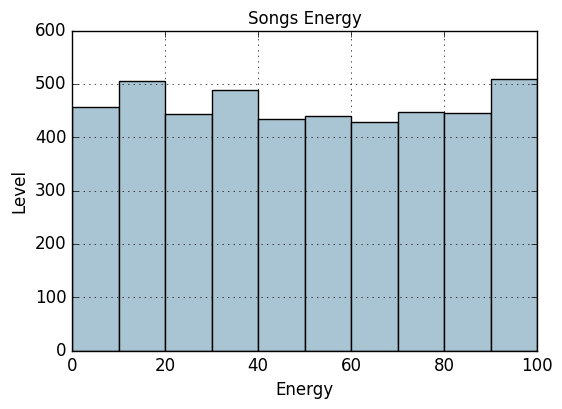

In [35]:
fig, ax = plt.subplots()
popsong_df['energy_%'].hist(color='#A9C5D3')
ax.set_title('Songs Energy', fontsize=12)
ax.set_xlabel('Energy', fontsize=12)
ax.set_ylabel('Level', fontsize=12)

In [40]:
popsong_df['Energy_bin_round'] = np.array(np.floor(np.array(popsong_df['energy_%']) / 10.))
popsong_df[['artist_count', 'energy_%', 'Energy_bin_round']].iloc[1071:1076]

,artist_count,energy_%,Energy_bin_round
1071,2,59,5.0
1072,2,88,8.0
1073,3,3,0.0
1074,1,95,9.0
1075,1,16,1.0


Ouantile based binning

In [41]:
popsong_df[['artist_count', 'energy_%', 'Energy_bin_round']].iloc[4:9]

,artist_count,energy_%,Energy_bin_round
4,3,60,6.0
5,4,84,8.0
6,1,91,9.0
7,1,37,3.0
8,3,32,3.0


Text(0, 0.5, 'Level')

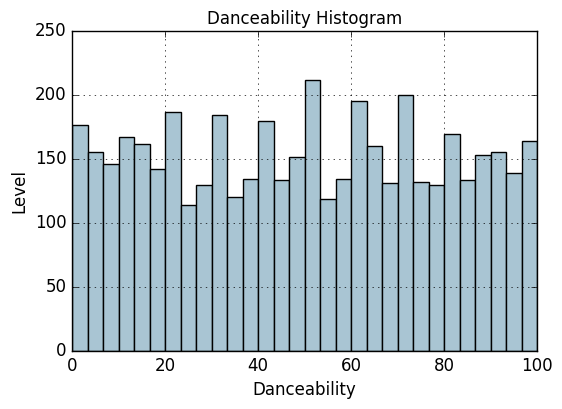

In [42]:
fig, ax = plt.subplots()
popsong_df['danceability_%'].hist(bins=30, color='#A9C5D3')
ax.set_title('Danceability Histogram', fontsize=12)
ax.set_xlabel('Danceability', fontsize=12)
ax.set_ylabel('Level', fontsize=12)


In [43]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = popsong_df['danceability_%'].quantile(quantile_list)
quantiles

,danceability_%
0.00,0.0
0.25,24.0
0.50,50.0
0.75,74.0
1.00,100.0


Text(0, 0.5, 'Level')

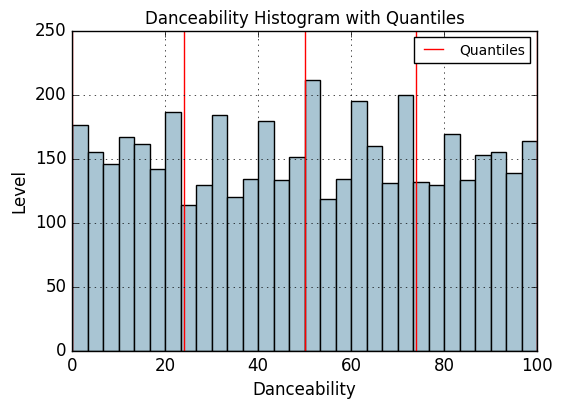

In [44]:
fig, ax = plt.subplots()
popsong_df['danceability_%'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Danceability Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Danceability', fontsize=12)
ax.set_ylabel('Level', fontsize=12)

In [45]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
popsong_df['Danceability_quantile_range'] = pd.qcut(popsong_df['danceability_%'],
                                                 q=quantile_list)
popsong_df['Danceability_quantile_label'] = pd.qcut(popsong_df['danceability_%'],
                                                 q=quantile_list, labels=quantile_labels)
popsong_df[['artist_count', 'energy_%', 'danceability_%',
               'Danceability_quantile_range', 'Danceability_quantile_label']].iloc[4:9]

,artist_count,energy_%,danceability_%,Danceability_quantile_range,Danceability_quantile_label
4,3,60,61,"(50.0, 74.0]",50-75Q
5,4,84,3,"(-0.001, 24.0]",0-25Q
6,1,91,93,"(74.0, 100.0]",75-100Q
7,1,37,93,"(74.0, 100.0]",75-100Q
8,3,32,12,"(-0.001, 24.0]",0-25Q


Mathematical Transformations

Log Transform

In [47]:
popsong_df['Danceability_log'] = np.log((1+ popsong_df['danceability_%']))
popsong_df[['artist_count', 'energy_%', 'danceability_%', 'Danceability_log']].iloc[4:9]

,artist_count,energy_%,danceability_%,Danceability_log
4,3,60,61,4.127134
5,4,84,3,1.386294
6,1,91,93,4.543295
7,1,37,93,4.543295
8,3,32,12,2.564949


Text(11.5, 450, '$\\mu$=3.64')

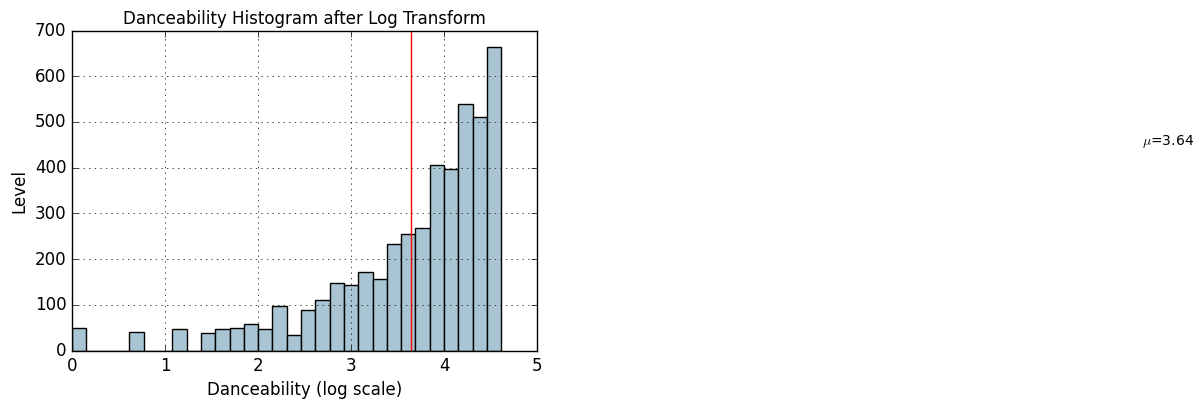

In [48]:
Danceability_log_mean = np.round(np.mean(popsong_df['Danceability_log']), 2)

fig, ax = plt.subplots()
popsong_df['Danceability_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(Danceability_log_mean, color='r')
ax.set_title('Danceability Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Danceability (log scale)', fontsize=12)
ax.set_ylabel('Level', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(Danceability_log_mean), fontsize=10)

In [50]:
dance = np.array(popsong_df['danceability_%'])
dance_clean = dance[~np.isnan(dance)]
dance_clean = dance_clean + 1e-6
l, opt_lambda = spstats.boxcox(dance_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.5691172372596602


In [52]:
popsong_df['danceability_boxcox_lambda_0'] = spstats.boxcox((1+popsong_df['danceability_%']),
                                                         lmbda=0)
popsong_df['danceability_boxcox_lambda_opt'] = spstats.boxcox(popsong_df['danceability_%'],
                                                           lmbda=opt_lambda)
popsong_df[['artist_count', 'energy_%', 'danceability_%', 'Danceability_log',
               'danceability_boxcox_lambda_0', 'danceability_boxcox_lambda_opt']].iloc[4:9]

,artist_count,energy_%,danceability_%,Danceability_log,danceability_boxcox_lambda_0,danceability_boxcox_lambda_opt
4,3,60,61,4.127134,4.127134,16.475981
5,4,84,3,1.386294,1.386294,1.526387
6,1,91,93,4.543295,4.543295,21.421954
7,1,37,93,4.543295,4.543295,21.421954
8,3,32,12,2.564949,2.564949,5.470240


Text(24, 450, '$\\mu$=13.52')

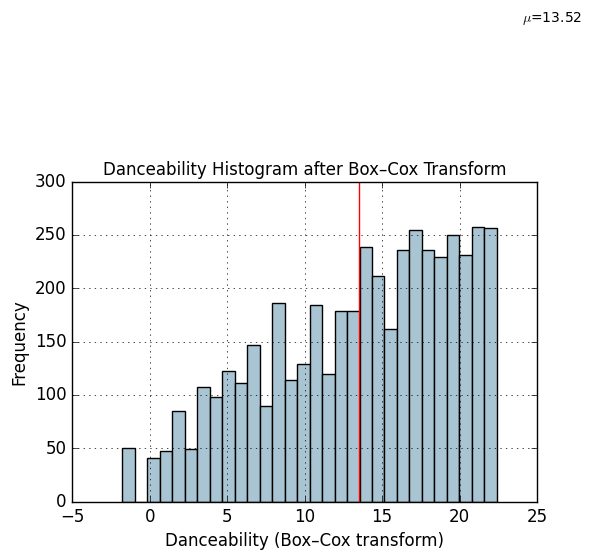

In [53]:

income_boxcox_mean = np.round(np.mean(popsong_df['danceability_boxcox_lambda_opt']), 2)

fig, ax = plt.subplots()
popsong_df['danceability_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Danceability Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Danceability (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)